


## ⚠️ WARNING ABOUT THE USE OF AN AI TOOL

This Jupyter notebook has an educational purpose: it is designed to help you better understand the theoretical tools developed during the course and to practice using the Python programming language, which is widely used in the IT industry.

To achieve this, we will explore a well-known problem — the Traveling Salesman Problem — for which many resources are readily available online. Consequently, an artificial intelligence tool would have no difficulty providing answers to most of the questions asked.

We strongly ask students not to use any generative AI tools for this tutorial. While such tools are extremely powerful and effective on classical or real-world business problems, they are not always reliable in a real-world coding context and are known to produce hallucinations.

This work must be done independently, as its goal is to help you build your own understanding and skills. The objective is not to complete the notebook as fast as possible, but rather to take the time to understand the presented concepts. The goal of the teaching is not to grade you, but to help you learn and grow.

Thank you for your understanding, and good luck with your work!

*P.S.: This notebook was originally created by Gwen Maudet and later reformatted with the assistance of an AI tool for clarity and consistency. *

## How Does This Jupyter Notebook Work?

In this Jupyter notebook, we present a simple example of an **NP-complete problem**, that is, a problem whose computational complexity grows exponentially with the size of the instance.

We first provide a set of basic tools (functions) to define the problem, evaluate a solution, and visualize it. You will then be asked to complete partially implemented functions in order to build several solution methods, including:

- an **exact brute-force approach**,  
- an **exact integer programming approach**,  
- an **approximate heuristic method**,  
- a **local search algorithm**,  
- a **genetic algorithm**, and  
- an **ant colony optimization algorithm**.

During this tutorial, you will be required to use external Python packages and existing functions. Since similar tasks are common in professional environments, you are expected to learn how to search for relevant documentation and examples online when you encounter unfamiliar functions or libraries.

We recommend using reliable platforms such as **Stack Overflow** or official documentation, and we encourage you to focus your questions on understanding the tools and libraries rather than trying to obtain complete solutions. The goal is to help you acquire the essential skills needed to eventually implement solutions on your own.


# On solving The Traveling Salesman Problem (TSP)

This notebook explores the Traveling Salesman Problem (TSP), one of the most well-known and widely studied problems in combinatorial optimization.

The TSP has gained prominence as one of the first optimization problems to be formally defined, originating in 1832. It represents a real-world scenario where the goal is to determine the shortest possible route that visits each city exactly once and returns to the starting city. The problem is described as follows:

*"Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city exactly once and returns to the starting city?"*

Despite its simplicity, the TSP is a classic example of NP problem, meaning that finding the optimal solution imply an exponential computational time regarding the dimension of the problem (number of cities to explore).

To begin exploring this problem, the following functions are given:

1. `generate_tsp` creates a set of cities in a 2-dimensional space.
2. `get_rounded_euclidean_distances` calculates the pairwise distances between 
3. `calculate_cost_of_a_route` calculates the total cost of a route.
4. `plot_tsp_with_route` function takes as input a TSP instance (a list of city coordinates) and an optional route (a sequence of city indices). If no route is provided, the function simply plots the cities.

Please read and understand all these functions, as this will be the base for this tutorial.



In [1]:
import numpy as np

def generate_tsp(n: int = 10):
    """
    Generate a Traveling Salesman Problem (TSP) instance by creating random points in 2D space.

    Args:
        n (int, optional): Number of nodes (cities). Defaults to 10.

    Returns:
        list[tuple[int, int]]: A list of tuples representing the coordinates of the cities.
    """
    instance = [
        (np.random.randint(100), np.random.randint(100)) for _ in range(n)
    ]
    return instance

In [2]:
from scipy.spatial.distance import euclidean

def get_rounded_euclidean_distances(instance):
    """
    Calculate the rounded Euclidean distance matrix for a TSP instance.

    Args:
        instance (list[tuple[int, int]]): A list of tuples representing the coordinates of the cities.

    Returns:
        list[list[int]]: A 2D list representing the cost matrix, where each entry [i][j] is the 
                         rounded Euclidean distance between city i and city j.
    """
    cost_matrix = []
    for city1 in instance:
        cost_vector = [
            round(euclidean(city1, city2)) for city2 in instance
        ]
        cost_matrix.append(cost_vector)
        
    print(f"Cost matrix:\n{cost_matrix}")
    return cost_matrix

In [3]:
def calculate_cost_of_a_route(cost_matrix, route):
    """
    Calculate the total cost of a given route for a TSP instance.

    Args:
        cost_matrix (list[list[int]]): A 2D list representing the pairwise cost matrix, 
                                       where cost_matrix[i][j] is the distance from city i to city j.
        route (list[int]): A list of integers representing the sequence of cities in the route.

    Returns:
        int: The total cost of the route, including the return to the starting city.
    """
    route_cost = 0
    # Sum the cost between consecutive cities in the route
    for i in range(1, len(route)):
        route_cost += cost_matrix[route[i - 1]][route[i]]
    # Add the cost of returning to the starting city
    route_cost += cost_matrix[route[-1]][route[0]]
    return route_cost

        

In [4]:
import matplotlib.pyplot as plt

def plot_tsp_with_route(instance, route=None):
    """
    Visualize a TSP instance and optionally draw a specific route.

    Args:
        instance (list[tuple[int, int]]): A list of tuples representing the coordinates of the cities.
        route (list[int], optional): A list of integers representing the sequence of cities in the route. 
                                     If None, only the cities are plotted. Defaults to None.

    Returns:
        None
    """
    # Extract x and y coordinates from the instance
    x_coords, y_coords = zip(*instance)
    
    # Plot the cities
    plt.figure(figsize=(8, 8))
    plt.scatter(x_coords, y_coords, c="blue", s=50, label="Cities")
    
    # Annotate the points with their indices
    for i, (x, y) in enumerate(instance):
        plt.text(x + 1, y + 1, f"{i}", fontsize=10, color="red")
    
    # If a route is provided, draw it
    if route is not None:
        route_coords = [instance[i] for i in route] + [instance[route[0]]]  # Close the loop
        route_x, route_y = zip(*route_coords)
        plt.plot(route_x, route_y, c="green", linestyle="--", linewidth=2, label="Route")
    
    plt.title("TSP Visualization")
    plt.xlabel("X Coordinate")
    plt.ylabel("Y Coordinate")
    plt.grid(True)
    plt.legend()
    plt.show()



# Exact Solving: Brute-Force Approach

The brute-force method is a simple yet computationally expensive technique to solve the Traveling Salesman Problem (TSP). It involves evaluating every possible route by permuting the order of cities and calculating the total travel distance for each. The shortest route among all these possibilities is guaranteed to be the optimal solution. 

This approach ensures accuracy but quickly becomes infeasible as the number of cities increases due to the factorial growth in the number of permutations. For `n` cities, the number of routes to evaluate is `n!`, which grows extremely fast. Therefore, while brute force is ideal for small instances, it is impractical for larger problems.

### How the Brute-Force Algorithm Works:
1. **Generate All Possible Routes:**  
   Enumerate all permutations of the cities using a systematic method such as the `itertools.permutations` function in Python. This generates every possible order in which the cities can be visited.

2. **Calculate the Distance for Each Route:**  
   For each route, compute the total distance by summing the pairwise distances between consecutive cities in the order of the route, including the return distance from the last city to the starting city.

3. **Select the Shortest Route:**  
   Compare all computed distances and identify the route with the smallest total distance.

### TO DO:
Please complete the Python function for the brute-force approach. 



In [53]:
import itertools

# Function to solve TSP using brute-force (exact method)
def exact_solving(cost_matrix):
    """
    Solve the Traveling Salesman Problem (TSP) using the brute-force approach.
    
    Args:
        cost_matrix (list[list[int]]): The cost matrix where cost_matrix[i][j] represents the distance from city i to city j.
    
    Returns:
        tuple: A tuple containing the optimal route and the corresponding total cost.
    """
    # Initialize variables to track the minimum cost and corresponding route
    min_cost = float('inf')
    optimal_route = None
    
    
    
    
    
    
    #TODO
    
    
    
    
    
    # Print results
    print("EXACT SOLVING RESULTS")
    print(f"Optimal Route: {optimal_route}")
    print(f"Total Cost: {min_cost}")
    
    return optimal_route, min_cost


### Testing Script:
First, we will set the seed to 0. If you are interested in exploring the influence of the seed, you can change it. It is possible to modify the seed used for instance creation (related to NumPy) or for the rest (related to the `random` package).


In [10]:
import random
seed = 0
np.random.seed(seed)  # Set the random seed for reproducibility
random.seed(seed)

The following script generates a TSP instance with 8 cities, computes the cost matrix using the Euclidean distance, and then applies the brute-force `exact_solving` function:

In [6]:
# Set the number of cities and generate a TSP instance
n = 8
instance = generate_tsp(n=n)

# Calculate the cost matrix using Euclidean distances
cost_matrix = get_rounded_euclidean_distances(instance)
# Solve the TSP using brute-force exact method
optimal_route, min_cost = exact_solving(cost_matrix)
plot_tsp_with_route(instance, route=optimal_route)




Cost matrix:
[[0, 28, 44, 47, 41, 49, 56, 23], [28, 0, 58, 50, 34, 22, 60, 6], [44, 58, 0, 20, 84, 79, 21, 57], [47, 50, 20, 0, 81, 68, 10, 51], [41, 34, 84, 81, 0, 34, 91, 31], [49, 22, 79, 68, 34, 0, 78, 26], [56, 60, 21, 10, 91, 78, 0, 61], [23, 6, 57, 51, 31, 26, 61, 0]]


NameError: name 'exact_solving' is not defined

### Expected Output:

When you run this script, your `exact_solving` function should output the following:

- **Optimal Route**: `(0, 2, 6, 3, 7, 1, 5, 4)`
- **Total Cost**: `229`

This means that the shortest route through all 8 cities, starting and ending at city 0, should be `(0, 2, 6, 3, 7, 1, 5, 4)` with a total distance of `229`.

To give you insights try with 10 cities, 12. (12 cities might not lead to a result, don't run it for more than 30 sec)



# Exact Solving: Integer Programming Approach (with PySCIPOpt)

**Integer Programming (IP)** is a general and powerful method for solving combinatorial optimization problems such as the **Travelling Salesman Problem (TSP)**.  
Instead of testing all possible tours, we describe the problem using mathematical variables and constraints, and let an optimization solver (here, **SCIP**) find the best solution.

This formulation is more scalable than brute force, although the TSP remains an **NP-hard** problem.

---

## Elements of the Mathematical Model

We first define all the components of the integer programming formulation.

### Sets and Indices

- Let 
  $$
  V = \{0, 1, \dots, n-1\}
  $$ 
  be the set of cities.

### Parameters

- Let  
  $$
  c_{ij}
  $$  
  be the travel cost (or distance) from city \(i\) to city \(j\), obtained from the **cost matrix**.

### Decision Variables

- For every pair of cities \(i, j \in V\), define a binary variable:
  $$
  x_{ij} =
  \begin{cases}
  1 & \text{if the tour goes directly from city } i \text{ to city } j \\
  0 & \text{otherwise}
  \end{cases}
  $$

These variables describe the structure of the tour.

---

## TO DO – Complete the Mathematical Formulation

Using the elements defined above, you must now complete the formulation of the TSP.

### 1. Objective Function

Write the objective function that **minimizes the total travel cost**:

$$
\text{Minimize } \quad \dots
$$

---

### 2. Constraints

Add the following constraints:

✅ **Each city must be left exactly once**

$$
\dots \quad \forall i \in V
$$

✅ **Each city must be entered exactly once**

$$
\dots \quad \forall j \in V
$$

✅ **No self-loops**

This one is given because it is a bit more tricky. For this, we introduce auxiliary variables $u_i$ representing the position of city $i$ in the tour, and add:

   $$
   u_i - u_j + n \cdot x_{ij} \leq n - 1 \quad \forall i \neq j, \; i, j \in V
   $$

---



## Solving with PySCIPOpt

`PySCIPOpt` is the Python interface for the **SCIP** optimization solver, which supports mixed-integer linear and nonlinear programming.


Below is the template code to implement the IP model for the TSP using PySCIPOpt.


### TO DO:

* Complete the objective function and the contraints defining the problem. You can use for instance the function quicksum.  
* Run the algorihtm and compare the results (optimal route and cost) with the **brute-force** solution for small problem sizes. If you don't have the good result, maybe you have a wrong formulation, so raise you hand, I'll come and help you.
* Observe how the solver behaves as the number of cities increases — the integer programming approach should handle larger instances than brute-force, but will still face limits as `n` grows.

In [8]:
from pyscipopt import Model, quicksum

def tsp_integer_programming(cost_matrix):
    """
    Solve the Traveling Salesman Problem (TSP) using Integer Programming (PySCIPOpt).

    Args:
        cost_matrix (list[list[int]]): The cost (distance) matrix between cities.

    Returns:
        tuple: The optimal route and its total cost.
    """
    n = len(cost_matrix)
    model = Model("TSP")

    # === Decision variables ===
    x = {}
    for i in range(n):
        for j in range(n):
            if i != j:
                x[i, j] = model.addVar(vtype="B", name=f"x({i},{j})")

    # Auxiliary variables for subtour elimination (MTZ)
    u = {}
    for i in range(1, n):
        u[i] = model.addVar(lb=1, ub=n-1, vtype="C", name=f"u({i})")

    # === Objective function ===
    model.setObjective(,
        "minimize"
    )

    # === Constraints ===
    # Each city is left exactly once
    for i in range(n):
        model.addCons()

    # Each city is entered exactly once
    for j in range(n):
        model.addCons()

    # Subtour elimination (MTZ constraints)
    for i in range(1, n):
        for j in range(1, n):
            if i != j:
                model.addCons()

    # Optimize the model
    model.optimize()

    # === Extract solution ===
    selected_edges = [(i, j) for (i, j) in x if model.getVal(x[i, j]) > 0.5]

    # Reconstruct route from selected edges
    route = [0]
    while len(route) < n:
        for i, j in selected_edges:
            if i == route[-1]:
                route.append(j)
                break
    route.append(0)  # return to start

    # Calculate total cost
    total_cost = calculate_cost_of_a_route(cost_matrix, route)

    print("INTEGER PROGRAMMING RESULTS")
    print(f"Optimal Route: {route}")
    print(f"Total Cost: {total_cost}")

    return route, total_cost

### Testing Script:
for this you should have the same result as for the bruteforce algorithm. Try with 8, 12, 15, 20, 25, 30 cities (might not work when it is too big).

In [15]:
# Set the number of cities and generate a TSP instance
n = 8
np.random.seed(seed)  # Set the random seed for reproducibility
instance = generate_tsp(n=n)

# Calculate the cost matrix using Euclidean distances
cost_matrix = get_rounded_euclidean_distances(instance)

optimal_route, min_cost = tsp_integer_programming(cost_matrix)
plot_tsp_with_route(instance, route=optimal_route)



Cost matrix:
[[0, 39, 64, 48, 50, 31, 40, 44, 25, 48, 64, 96, 82, 103, 81, 45, 42, 66, 37, 58, 2, 82, 74, 49, 47, 57, 80, 54, 44, 105], [39, 0, 60, 72, 43, 42, 43, 25, 28, 72, 26, 67, 48, 65, 48, 22, 25, 29, 58, 24, 38, 44, 38, 15, 13, 33, 41, 34, 68, 65], [64, 60, 0, 45, 17, 34, 96, 35, 42, 46, 60, 53, 58, 89, 54, 82, 36, 59, 39, 82, 62, 69, 93, 75, 51, 34, 69, 94, 45, 94], [48, 72, 45, 0, 44, 31, 88, 57, 44, 1, 86, 96, 95, 124, 92, 87, 55, 88, 14, 96, 47, 101, 110, 86, 71, 65, 100, 98, 4, 127], [50, 43, 17, 44, 0, 21, 79, 19, 26, 45, 47, 53, 51, 81, 47, 65, 19, 47, 33, 66, 48, 59, 78, 58, 35, 22, 59, 77, 43, 85], [31, 42, 34, 31, 21, 0, 66, 27, 14, 31, 56, 73, 67, 94, 64, 59, 25, 57, 17, 66, 29, 72, 80, 57, 40, 37, 71, 71, 28, 98], [40, 43, 96, 88, 79, 66, 0, 64, 54, 88, 67, 110, 90, 100, 90, 27, 63, 70, 77, 43, 41, 83, 55, 39, 56, 75, 80, 25, 84, 98], [44, 25, 35, 57, 19, 27, 64, 0, 20, 57, 30, 52, 41, 68, 39, 47, 2, 31, 43, 47, 42, 45, 59, 39, 16, 13, 44, 59, 54, 71], [25, 28, 42, 

KeyboardInterrupt: 

You Can try different number of cities, to evaluate the interest of building this IP model compared to the bruteforce appraoch.

# Approximate Algorithms

When the number of cities is too large (try testing the brute-force algorithm for `n > 12`), the brute-force and the IP approaches becomes too slow. One way to obtain a good solution, without the guarantee of optimality, is to use approximate algorithms. 

In this section, we will explore several methods that provide good solutions in reasonable time, starting with heuristics and local search techniques, followed by population based meta heuristics. These algorithms may not always guarantee the optimal solution, but they offer a practical balance between generalisable framework, solution quality and computational efficiency.







## Nearest Neighbor

A natural method to find a solution quickly is called the **Nearest Neighbor Heuristic**. This approach builds the solution iteratively by repeatedly selecting the closest unvisited city, starting from a randomly chosen city. It's important to note that the choice of the initial city can have a significant impact on the final result. The complexity of this algorithm is \(O(n^2)\), where \(n\) is the number of cities, as we need to evaluate the distance to each unvisited city at each step.

### Task:
Below, implement the Nearest Neighbor Heuristic in Python. Here's a big picture of how the algorithm works:

1. Start from a randomly chosen city.
2. At each step, find the closest city that has not yet been visited.
3. Add that city to the route and repeat until all cities have been visited.
4. Return the constructed route and the total cost.

Make sure your code correctly implements these steps and calculates the total cost of the route.

The outcome is supposed to be:

`GREEDY ALGO RESULTS`

`Route: [6, 3, 2, 0, 7, 1, 5, 4]`

`Total Cost: 250`


In [56]:
import random

def nearest_neighbor(cost_matrix):
    n = len(cost_matrix)
    # Start from a random city
    start = random.randint(0, n - 1)
    greedy_route = [start]
    
    
    
    
    #TODO
    
    
    
    
    
    
    # Calculate the total cost of the route
    greedy_cost = calculate_cost_of_a_route(cost_matrix, greedy_route)
    
    print("GREEDY ALGO RESULTS")
    print(f"Route: {greedy_route}")
    print(f"Total Cost: {greedy_cost}")
    
    return greedy_route, greedy_cost

n = 8
np.random.seed(seed)  # Set the random seed for reproducibility
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)
random.seed(seed)#remove if you want other solutions
greedy_route, greedy_cost = nearest_neighbor(cost_matrix)


GREEDY ALGO RESULTS
Route: [6, 3, 2, 0, 7, 1, 5, 4]
Total Cost: 250


## Local Search (Metaheuristic)

Local search is a robust approach for iteratively improving solutions by exploring the neighborhood of an initial solution generated by a heuristic. This method capitalizes on the structure of the problem to refine solutions step-by-step, aiming for a more optimal result.

For the Traveling Salesman Problem (TSP), a commonly used local search technique is the **2-opt** algorithm. The algorithm refines an initial route (e.g., from the Nearest Neighbor heuristic) by swapping pairs of cities to minimize the total travel cost.

---

### Steps to Implement the **2-opt** Algorithm:

1. **Initialize with a Starting Route**: Begin with a route generated by a heuristic, such as the Nearest Neighbor method, or any initial route.

2. **Evaluate All Possible Swaps**: For every possible pair of cities \( i \) and \( k \) in the route, consider the effect of reversing the segment between these cities:
   - A **swap** involves reversing the segment of the route between \( i \) and \( k \). This effectively replaces two edges in the original route with two new ones, potentially leading to a shorter route.

3. **Perform Beneficial Swaps**: If a swap reduces the total route cost, update the route to reflect this improvement.

4. **Iterate Until Convergence**: Repeatedly evaluate and perform swaps until no further improvement in route cost can be achieved.

5. **Terminate Based on an Improvement Threshold**: The algorithm stops when the improvement in route cost between iterations falls below a pre-defined threshold (e.g., **0.1**). This ensures that the process halts when further refinements are no longer meaningful.

   - **Improvement Threshold**: The stopping condition compares the ratio of the cost improvement between consecutive iterations to the threshold. If the improvement ratio is smaller than the threshold, the search terminates.

---

### To Do:
Complete the implementation of the **2-opt** local search algorithm following the principles outlined above.

The result should be:

`TWO OPT ALGO RESULTS`

`Route: [6, 3, 2, 0, 4, 5, 1, 7]`

`Total Cost: 238`

In [57]:
import copy
import numpy as np

# Reverse the order of all elements from index i to index k in the route
def two_opt_swap(route, i, k):
    # This function reverses the segment between i and k in the route
    return route[:i] + list(reversed(route[i:k+1])) + route[k+1:]

def one_time_two_opt(cost_matrix, route):
    """
    Perform a single iteration of the 2-opt algorithm (trying all swaps).
    
    Args:
        cost_matrix (list): Matrix containing the distance between cities.
        route (list): The current route being improved.
        
    Returns:
        tuple: The best route found and its total cost.
    """
    best_route = route
    best_cost = calculate_cost_of_a_route(cost_matrix, route)
    
   
   
   #TODO
    
    return best_route, best_cost

def two_opt(cost_matrix, route, improvement_threshold=0.1):
    """
    Apply the 2-opt algorithm to improve the given route iteratively.
    
    Args:
        cost_matrix (list): Matrix containing the distance between cities.
        route (list): The initial route to improve.
        improvement_threshold (float): The minimum improvement ratio to stop the algorithm.
        
    Returns:
        tuple: The best route found and its total cost.
    """
    two_opt_route = copy.copy(route)  # Copy the initial route to work on it
    two_opt_cost = calculate_cost_of_a_route(cost_matrix, route)  # Calculate the cost of the initial route
    improvement_factor = 1  # Initialize improvement factor to start the loop
    
    # Keep improving the route until the improvement factor falls below the threshold
    while improvement_factor > improvement_threshold:
        improvement_factor = (two_opt_cost - maybe_better_cost) / two_opt_cost  # Calculate the improvement ratio
    
    print("TWO OPT ALGO RESULTS")
    print(f"Route: {two_opt_route}")
    print(f"Total Cost: {two_opt_cost}")
    
    return two_opt_route, two_opt_cost

n = 8
np.random.seed(seed)  # Set the random seed for reproducibility
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)
two_opt_route, two_opt_cost = two_opt(cost_matrix, greedy_route, 0.2)


TWO OPT ALGO RESULTS
Route: [6, 3, 2, 0, 4, 5, 1, 7]
Total Cost: 238


### Performance Comparison of Different Methods

In this section, we will compare the performance of the different algorithms we have implemented for solving the Traveling Salesman Problem (TSP). We will evaluate the results in terms of the total cost of the route, with a focus on understanding how the different methods perform under the same instance.

We will use a small instance with **8 cities** to keep the computation manageable, and the goal is to assess the effectiveness and efficiency of each algorithm in finding an optimal or near-optimal solution.

Comparison between:

2. **exact solving** 
3.the **Nearest Neighbor heuristic** 
4. the **2-opt** method with two different improvement thresholds: **0.2** and **0.01**.

Cost matrix:
[[0, 28, 44, 47, 41, 49, 56, 23], [28, 0, 58, 50, 34, 22, 60, 6], [44, 58, 0, 20, 84, 79, 21, 57], [47, 50, 20, 0, 81, 68, 10, 51], [41, 34, 84, 81, 0, 34, 91, 31], [49, 22, 79, 68, 34, 0, 78, 26], [56, 60, 21, 10, 91, 78, 0, 61], [23, 6, 57, 51, 31, 26, 61, 0]]
EXACT SOLVING RESULTS
Optimal Route: (0, 2, 6, 3, 7, 1, 5, 4)
Total Cost: 229


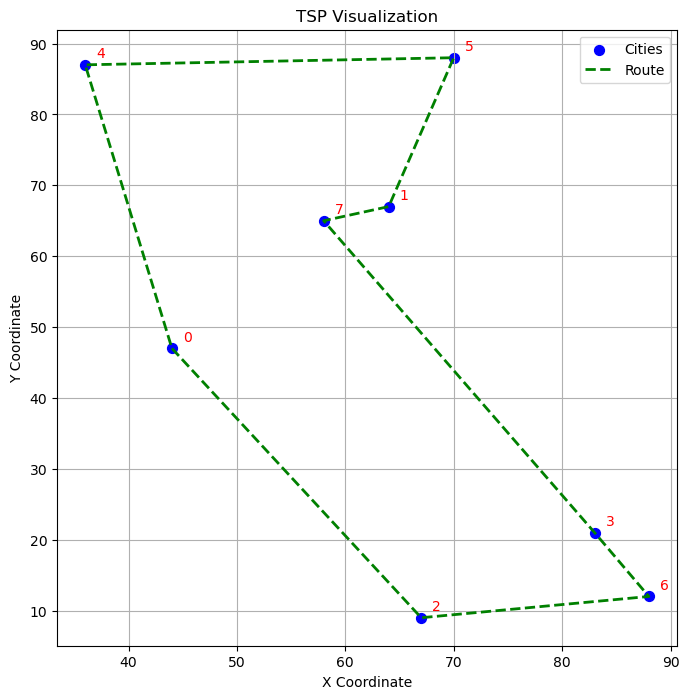

GREEDY ALGO RESULTS
Route: [6, 3, 2, 0, 7, 1, 5, 4]
Total Cost: 250


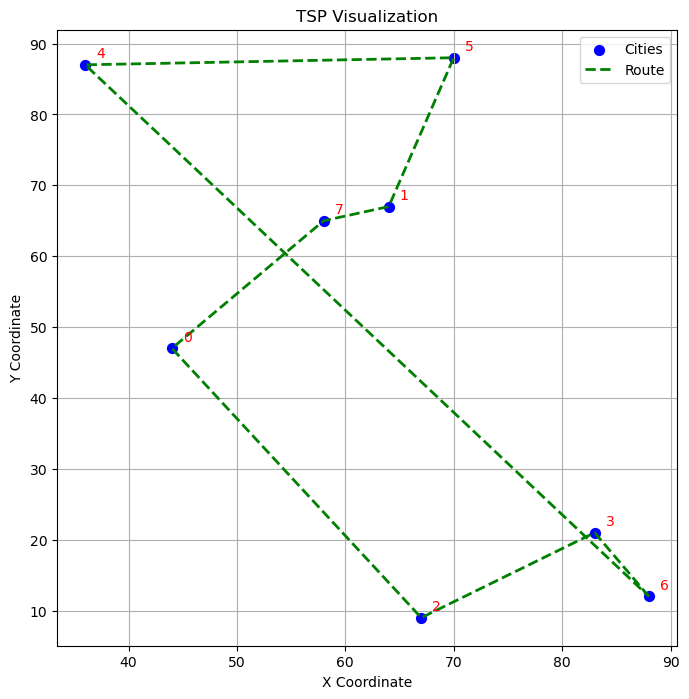

TWO OPT ALGO RESULTS
Route: [6, 3, 2, 0, 4, 5, 1, 7]
Total Cost: 238


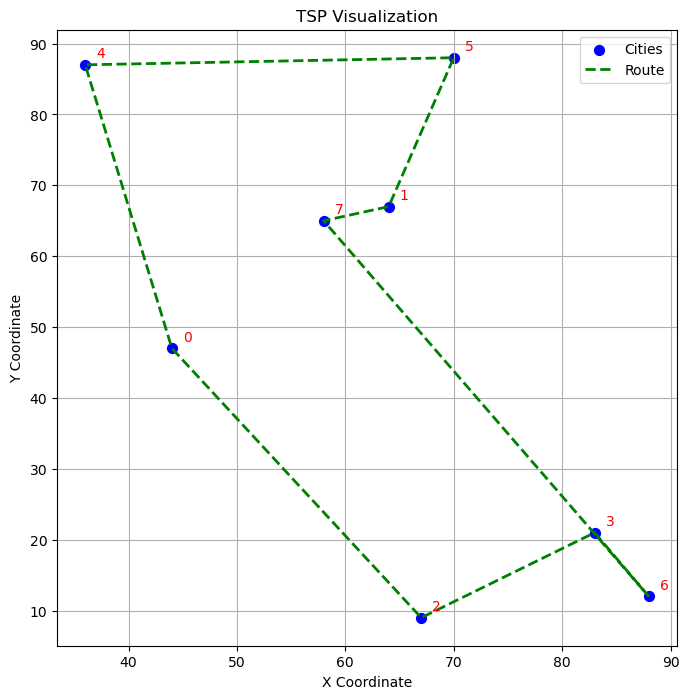

TWO OPT ALGO RESULTS
Route: [6, 3, 7, 1, 5, 4, 0, 2]
Total Cost: 229


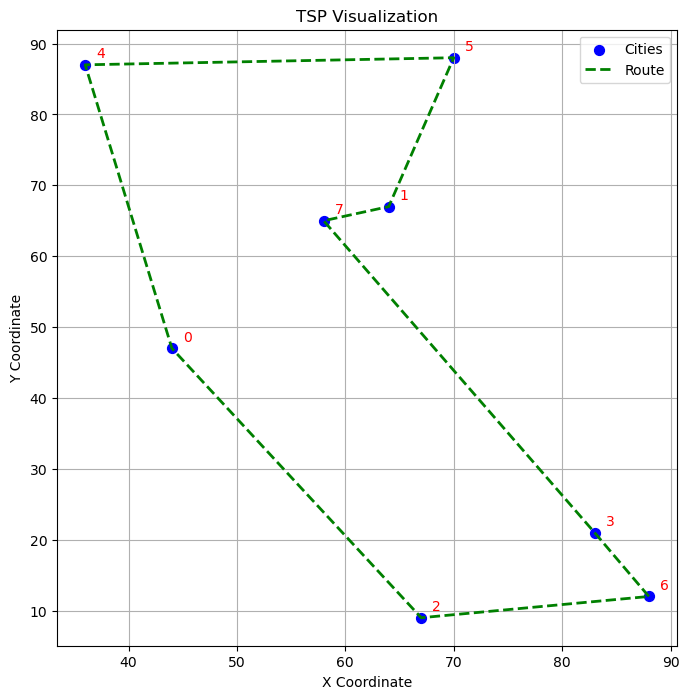

In [58]:
np.random.seed(seed)#remove if you want other instance
n=8
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)


random.seed(seed)#remove if you want other solutions
optimal_route,min_cost = exact_solving(cost_matrix)
plot_tsp_with_route(instance, route=optimal_route)
greedy_route,greedy_route_cost = nearest_neighbor(cost_matrix)
plot_tsp_with_route(instance, route=greedy_route)
two_opt_route,two_opt_cost = two_opt(cost_matrix,greedy_route, 0.2)
plot_tsp_with_route(instance, route=two_opt_route)
two_opt_route,two_opt_cost = two_opt(cost_matrix,greedy_route, 0.01)
plot_tsp_with_route(instance, route=two_opt_route)



### Scaling the TSP to 100 Cities

Next, we scale the problem to **100 cities** to evaluate how different algorithms handle larger problem sizes. As the number of cities increases, finding an exact solution through brute force becomes computationally impractical. Therefore, we will rely on the **Greedy Nearest Neighbor heuristic** and the **2-opt local search** to approximate the solution.

Additionally, we will apply the **2-opt algorithm** to an initially random route to assess its performance in this scenario.

For this experiment, we will also record the execution time for each method to compare their computational efficiency.


In [5]:
import time
import random

# Scaling up to 100 cities

np.random.seed(seed)#remove if you want other instance
n = 100
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)




random.seed(seed)#remove if you want other solutions
# Timing the Greedy Nearest Neighbor heuristic
start_time = time.time()
greedy_route, greedy_route_cost = nearest_neighbor(cost_matrix)
greedy_duration = time.time() - start_time
print(f"Greedy Nearest Neighbor Cost: {greedy_route_cost}, Duration: {greedy_duration:.4f} seconds")
plot_tsp_with_route(instance, route=greedy_route)

# Timing 2-opt on the greedy route with different thresholds
start_time = time.time()
two_opt_route_greedy_1, two_opt_cost_greedy_1 = two_opt(cost_matrix, greedy_route, 0.2)
two_opt_greedy_1_duration = time.time() - start_time
print(f"2-Opt on Greedy Route (Threshold 0.2) Cost: {two_opt_cost_greedy_1}, Duration: {two_opt_greedy_1_duration:.4f} seconds")
plot_tsp_with_route(instance, route=two_opt_route_greedy_1)

start_time = time.time()
two_opt_route_greedy_2, two_opt_cost_greedy_2 = two_opt(cost_matrix, greedy_route, 0.01)
two_opt_greedy_2_duration = time.time() - start_time
print(f"2-Opt on Greedy Route (Threshold 0.01) Cost: {two_opt_cost_greedy_2}, Duration: {two_opt_greedy_2_duration:.4f} seconds")
plot_tsp_with_route(instance, route=two_opt_route_greedy_2)

# Generate a random initial route
random_route = list(range(n))
random.shuffle(random_route)
random_route_cost = calculate_cost_of_a_route(cost_matrix, random_route)
print(f"Random Route Initial Cost: {random_route_cost}")
plot_tsp_with_route(instance, route=random_route)

# Timing 2-opt on the random route with different thresholds
start_time = time.time()
two_opt_route_random_1, two_opt_cost_random_1 = two_opt(cost_matrix, random_route, 0.2)
two_opt_random_1_duration = time.time() - start_time
print(f"2-Opt on Random Route (Threshold 0.2) Cost: {two_opt_cost_random_1}, Duration: {two_opt_random_1_duration:.4f} seconds")
plot_tsp_with_route(instance, route=two_opt_route_random_1)

start_time = time.time()
two_opt_route_random_2, two_opt_cost_random_2 = two_opt(cost_matrix, random_route, 0.01)
two_opt_random_2_duration = time.time() - start_time
print(f"2-Opt on Random Route (Threshold 0.01) Cost: {two_opt_cost_random_2}, Duration: {two_opt_random_2_duration:.4f} seconds")
plot_tsp_with_route(instance, route=two_opt_route_random_2)


NameError: name 'seed' is not defined

## Genetic Algorithm (Population-Based) Metaheuristics

After exploring local search methods, we now move on to the design of a **Genetic Algorithm (GA)**. A genetic algorithm is a population-based metaheuristic that exploits the structure of candidate solutions — in this case, **permutations** — to progressively improve solution quality over several generations.

Instead of implementing a genetic algorithm entirely from scratch, we rely on the Python library **DEAP**. DEAP provides a flexible and well-documented framework for building evolutionary algorithms such as genetic algorithms, genetic programming, and related methods. It includes a wide range of tools that simplify the implementation of essential evolutionary operators like **selection**, **crossover (recombination)**, and **mutation**. For more details, you may consult the official DEAP documentation:  
https://deap.readthedocs.io/en/stable/

Although DEAP offers high-level functions such as `eaSimple`, which can run a complete genetic algorithm based on predefined parameters, we intentionally choose a more manual implementation. This approach gives you more control over each step of the algorithm and allows you to better understand how evolutionary processes work internally.

Because the TSP is a **permutation-based problem**, we focus specifically on DEAP’s operators designed for permutations. These include specialized **crossover** and **mutation** functions that preserve the validity of tours.

Using the documentation of the DEAP tools:  
https://deap.readthedocs.io/en/stable/api/tools.html  
you are asked to identify and test crossover and mutation operators that are compatible with permutation-based representations. In total, **two crossover operators** that does not include extra parameter and **one mutation operator** with just the "indpb" parameter are compatible with this problem, as they preserve the permutation property.

The theoretical explanations of these operators are not always easy to find online (except in the original research papers). For this reason, the use of a **generative AI tool is permitted in this section**, provided your goal is to genuinely understand how these operators function.

---

### TO DO

- Try different crossover and mutation operators.
- Check whether the resulting offspring are valid permutations.
- Observe how these choices affect solution quality and convergence.


In [63]:
import random
from deap import base, creator, tools



def define_the_elements_of_the_GA(n):
    creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMin)
    
    # Define the toolbox
    toolbox = base.Toolbox()
    
    # Initialize individual (permutation of cities)
    toolbox.register("indices", random.sample, range(n), n)  # Randomly sample n cities for the individual
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.indices)  # Individual is a permutation of cities
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)  # Population is a list of individuals
    
    # Evaluation function (to calculate the total cost of the route)
    def EVALUATE(individual):
        return calculate_cost_of_a_route(cost_matrix, individual),
    
    # Register the evaluation function
    toolbox.register("evaluate", EVALUATE)
    
    # Register the genetic operators
    toolbox.register("mate")  # Crossover operator
    #toolbox.register("mate", tools.cxOrdered)
    toolbox.register("mutate", indpb=0.1)  # Mutation operator
    
    toolbox.register("select", tools.selTournament, tournsize=TOURNAMENT_SIZE)
    return toolbox



n = 8
import time
random.seed(time.time()) # this is in order to always have different examples
# Generate list of city indices
cities = [i for i in range(n)]
made_toolbox = define_the_elements_of_the_GA(n)
# Generate all permutations of the cities
all_permutations = list(itertools.permutations(cities))
perm_1 = list(random.choice(all_permutations))
perm_2 = list(random.choice(all_permutations))
print(perm_1,perm_2,"initial childrens")
made_toolbox.mate(perm_1, perm_2)
print(perm_1,perm_2, "mated")
print(perm_2,perm_1, "mated but reversed to see more")

perm_1 = list(random.choice(all_permutations))
print(perm_1,"initial child")
made_toolbox.mutate(perm_1)
print(perm_1,"one element is mutated with 10% proba")


### Reading The Complete GA
Now, consider these operators you chose, and read how it is included in the whole GA framework.

In [ ]:
import random
from deap import base, creator, tools



# Define the genetic algorithm function
def run_genetic_algorithm(POPULATION_SIZE, N_ITERATIONS, CX_PB, MUT_PB, TOURNAMENT_SIZE):
    """
    Runs a genetic algorithm for the TSP problem.
    
    Args:
        POPULATION_SIZE: Size of the population.
        N_ITERATIONS: Number of generations.
        CX_PB: Crossover probability.
        MUT_PB: Mutation probability.
        TOURNAMENT_SIZE: Size of the tournament for selection.
    """
    toolbox = define_the_elements_of_the_GA(n)

    # Initialize the population using tools.initRepeat
    population = toolbox.population(n=POPULATION_SIZE)

    # Evaluate the initial population
    for ind in population:
        ind.fitness.values = toolbox.evaluate(ind)

    # Create a Hall of Fame object to track the best candidate across generations
    hof = tools.HallOfFame(1) 
    
    # List to store the best score (fitness value) of each generation
    best_scores_per_generation = []

    # Evolutionary algorithm
    for gen in range(N_ITERATIONS):
        # Select the next generation using tournament selection
        offspring = toolbox.select(population, len(population))
        offspring = list(map(toolbox.clone, offspring))
        
        # Apply crossover and mutation to produce new offspring
        for child1, child2 in zip(offspring[::2], offspring[1::2]):
            if random.random() < CX_PB:
                toolbox.mate(child1, child2)
                del child1.fitness.values
                del child2.fitness.values

        for mutant in offspring:
            if random.random() < MUT_PB:
                toolbox.mutate(mutant)
                del mutant.fitness.values

        # Evaluate the individuals with the invalid fitness
        for ind in offspring:
            if not ind.fitness.valid:
                ind.fitness.values = toolbox.evaluate(ind)

        # Replace the old population by the new one
        population[:] = offspring

        # Update the Hall of Fame
        hof.update(population)

        # Store the best score of this generation
        best_scores_per_generation.append(hof[0].fitness.values[0])

    # After the loop, print the final result
    best_score = hof[0].fitness.values[0]  # The best score from Hall of Fame
    print(f"Best score after {N_ITERATIONS} generations: {best_score} with solution being {hof[0]}")
    
    return hof[0], best_score, best_scores_per_generation  # Return the best score for each generation

### Convergence Plot for Genetic Algorithm

Once the genetic algorithm has run for a certain number of generations, we can analyze its convergence by examining how the fitness of the best solution evolves over time. The **convergence plot** shows the best fitness score at each generation, helping us visualize how quickly the algorithm is improving and whether it reaches a plateau.

The plot demonstrates the **progress of the algorithm**: ideally, you should observe a decrease in the fitness score (if we're minimizing the cost), indicating that the algorithm is progressively finding better solutions. 




In [6]:
def plot_convergence(best_scores_per_generation, N_ITERATIONS):
    """
    Plots the convergence of the genetic algorithm by showing the best fitness
    values for each generation.
    
    Args:
        best_scores_per_generation (list): A list containing the best fitness values
                                            for each generation.
        N_ITERATIONS (int): Number of generations.
    """
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, N_ITERATIONS + 1), best_scores_per_generation, marker='o', color='b', linestyle='-', markersize=5)
    
    plt.title('Convergence Plot: Best Fitness Value per Generation', fontsize=14)
    plt.xlabel('Generation', fontsize=12)
    plt.ylabel('Best Fitness Value (Cost)', fontsize=12)
    
    plt.grid(True)
    plt.show()


np.random.seed(seed)#remove if you want other instance
n = 100
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)




random.seed(seed)#remove if you want other solutions
# Parameters for the genetic algorithm
POPULATION_SIZE = 100
N_ITERATIONS = 100
CX_PB = 0.95  # Crossover probability
MUT_PB = 0.1  # Mutation probability
TOURNAMENT_SIZE = 10  # Tournament size for selection

best_route, best_cost,best_scores_per_generation = run_genetic_algorithm(POPULATION_SIZE, N_ITERATIONS, CX_PB, MUT_PB, TOURNAMENT_SIZE)
print(len(best_route))
plot_convergence(best_scores_per_generation, N_ITERATIONS)


NameError: name 'seed' is not defined

### Questions to Consider:
Please modify parameters of problem and the GA and find conclusions to these questions:
- **What conclusions can you draw from the convergence plot?**  
  Does the algorithm converge quickly, or does it take many generations to see improvement?
  
- **How are the performances of different configurations?**  
  How do the population size number of generation affect the convergence and the quality of the final solution?

- **Is the solution obtained from the genetic algorithm close to the optimal one?**  
  Compare the final result with the other heuristic solutions. What do you conclude? Why such conclusion?

These reflections will help you understand the performance of the genetic algorithm in solving the Traveling Salesman Problem and guide you in fine-tuning the algorithm for better results.

## Ant Colony Optimization

Ant Colony Optimization (ACO) is a population-based metaheuristic inspired by the foraging behavior of real ants. In this approach, a colony of artificial ants collaboratively searches for high-quality solutions to optimization problems by mimicking how ants find paths between their colony and food sources. Ants communicate indirectly by depositing pheromones along the paths they traverse, and the concentration of pheromones influences the likelihood that other ants will follow the same paths.

### Key Components of the ACO Algorithm:

1. **Pheromone Matrix**:  
   - A pheromone matrix is initialized, where each pair of cities (i, j) is assigned an initial pheromone level. This matrix is continuously updated throughout the algorithm to reflect the quality of the solutions discovered by the ants.

2. **Ants' Behavior**:  
   - **Initialization**: Each ant starts at a randomly chosen city.
   - **Tour Construction**: From its current city, the ant selects the next city to visit based on a probability distribution influenced by pheromone levels.  
     - In the first version of the algorithm, **only pheromone levels** are considered. The pheromone values for already visited cities are set to zero. For unvisited cities, the probabilities are calculated as the pheromone level raised to the power of `alpha`, then normalized by dividing by the sum of the possible edge weights.

3. **Pheromone Update**:  
   - After all ants have completed their tours, the pheromone matrix is updated to reflect the quality of their solutions.  
   - **Evaporation**: A portion of the pheromone evaporates over time to prevent premature convergence to suboptimal paths.  
   - **Reinforcement**: Paths taken by ants are reinforced with pheromone deposits. The reinforcement is inversely proportional to the tour cost (shorter paths receive more pheromone).  
     - Specifically, a pheromone deposit of `Q / cost` is added to the paths in the ant's tour, where `Q` is a constant and `cost` is the total distance of the solution.

4. **Iteration and Stopping Criterion**:  
   - The algorithm iteratively constructs tours and updates pheromones for a predefined number of iterations or until a satisfactory solution is found.


### Explanation of Key Functions:

1. **choose_next_city_pheromone_only()**:  
   - This function determines the next city an ant should visit based only on pheromone levels.  
   - Pheromone levels for visited cities are set to zero, and probabilities are calculated for the unvisited cities by raising their pheromone levels to the power of `alpha` and normalizing the values to sum to 1. The next city is chosen probabilistically.

2. **update_pheromones()**:  
   - This function updates the pheromone matrix after each iteration.  
   - It simulates natural evaporation by reducing all pheromone values by a factor of `(1 - evaporation_rate)`.  
   - The paths in the ants' tours are then reinforced with additional pheromone deposits proportional to `Q / cost`, rewarding shorter routes.


### Pheromone Update Mechanism:

1. **Evaporation**:  
   - At the start of each iteration, pheromone levels are reduced by a factor of `(1 - evaporation_rate)`, simulating natural pheromone decay.

2. **Reinforcement**:  
   - After all ants complete their tours, the pheromone levels of the traversed paths are incremented by `Q / cost`, where `cost` is the total length of the tour. This ensures that shorter tours are more heavily reinforced, encouraging exploration of these paths in subsequent iterations.

### To Do:
   - **choose_next_city_pheromone_only()**
   - **update_pheromones()**
   - **ant_colony_optimization()**

In [81]:
import random
import numpy as np



# Function to choose the next city based on pheromone levels only (ignoring cost matrix)
def choose_next_city_pheromone_only(current_city, visited_cities, pheromone_matrix, alpha=1,beta=2,cost_matrix=cost_matrix):# here, beta and cost_matrix are not used
    # Choose the next city based on pheromone levels only (ignores cost matrix)
    pheromone = pheromone_matrix[current_city].copy()  # Copy to avoid modifying the original matrix
    
    
    #TODO
    
    
    
    # Choose the next city based on these probabilities
    next_city = np.random.choice(range(len(pheromone)), p=probabilities)
    return next_city



# Function to update pheromones (reinforce the paths based on the ants' solutions)
def update_pheromones(pheromone_matrix, ants, evaporation_rate=0.5, Q=1):
    # Evaporate pheromones to simulate natural pheromone decay
    
    #TODO
    
    # Update pheromones for each ant's solution
    
    #TODO

# ACO Main Loop with pheromone-based city selection only
def ant_colony_optimization(n, cost_matrix, n_ants=50, max_iterations=100, alpha=1,beta=2, evaporation_rate=0.5, Q=1,next_city_function=choose_next_city_pheromone_only):
    pheromone_matrix = np.ones((n, n))  # Initialize pheromone matrix
    best_route = None
    best_cost = float('inf')
    best_costs_over_iterations = []  # To store the best cost at each iteration
    
    for iteration in range(max_iterations):
        ants = []# each ant is a tuple (route, route_cost)
        for ant in range(n_ants):

            # Construct the tour for the current ant by choosing the next city based on pheromones only
            
            #TODO
            
            
            # Update the best solution found so far
            
            #TODO

        # Update pheromones based on ants' solutions
        update_pheromones(pheromone_matrix, ants, evaporation_rate, Q)
        
        # Store the best cost for this iteration
        best_costs_over_iterations.append(best_cost)

        # Print progress every iteration (optional)
        # print(f"Iteration {iteration+1}/{max_iterations}, Best Cost: {best_cost}")
    
    # Print the final results
    print(f"Best Route: {best_route}")
    print(f"Best Cost: {best_cost}")
    # Return the best route, best cost, and the costs over generations
    return best_route, best_cost, best_costs_over_iterations


### Convergence Plot for Ant colonies

On peut aussi analyser les performances de l'algorithmes des fourmis. Bien que les parametres sont analogues (taille de population, nombre de generation), la compléxité est plus importante pour cet algorithme, car chaque fourmis doit construire sont chemin par analyse des chemins possibles a chaque fois, d'ou une complexité en O(N^2) par chemin par fourmis (ce qui n'est aps le cas pour l'algorihtme génétique). 


Evaluer les resultats de cette méthode, en comparaisons des autres méthodes presente sur ce jupyter.



Cost matrix:
[[0, 28, 44, 47, 41, 49, 56, 23, 40, 41, 38, 36, 47, 41, 41, 17, 64, 44, 32, 41, 16, 43, 20, 30, 24, 32, 21, 64, 10, 40, 42, 40, 21, 47, 10, 37, 35, 66, 60, 36, 37, 37, 43, 44, 32, 47, 57, 28, 49, 41, 23, 12, 52, 53, 44, 15, 46, 65, 30, 35, 57, 11, 24, 66, 22, 54, 38, 61, 37, 37, 11, 24, 52, 36, 42, 39, 48, 29, 5, 18, 37, 49, 62, 64, 25, 54, 35, 23, 27, 57, 45, 51, 43, 33, 27, 32, 38, 40, 19, 46], [28, 0, 58, 50, 34, 22, 60, 6, 32, 28, 34, 40, 59, 46, 13, 17, 37, 30, 59, 70, 43, 58, 36, 34, 52, 16, 49, 93, 31, 66, 49, 65, 36, 63, 25, 63, 23, 72, 59, 56, 28, 11, 58, 66, 19, 54, 54, 44, 56, 28, 15, 39, 28, 27, 66, 43, 31, 68, 24, 43, 86, 23, 42, 69, 32, 30, 28, 59, 24, 65, 25, 31, 57, 60, 64, 38, 68, 55, 31, 11, 39, 76, 67, 64, 25, 53, 42, 15, 7, 58, 60, 56, 15, 52, 55, 60, 17, 16, 47, 19], [44, 58, 0, 20, 84, 79, 21, 57, 83, 82, 31, 80, 5, 85, 70, 59, 91, 45, 39, 48, 36, 2, 25, 74, 51, 47, 46, 68, 54, 68, 86, 71, 24, 87, 55, 32, 76, 26, 104, 14, 79, 60, 85, 21, 44, 13, 102,

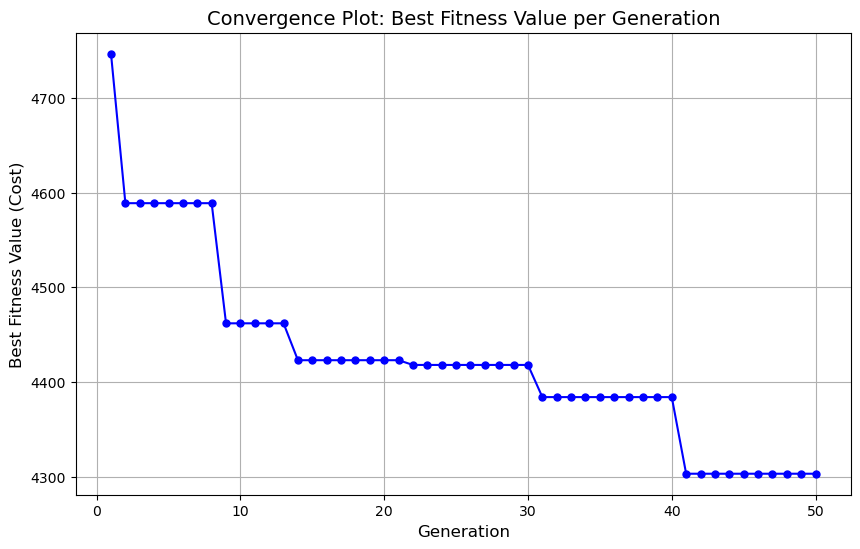

In [75]:
np.random.seed(seed)#remove if you want other instance
n = 100
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)




random.seed(seed)#remove if you want other solutions
alpha = 1  # Pheromone importance
beta = 2  # Distance importance
evaporation_rate = 0.5  # Pheromone evaporation
Q = 100  # Total pheromone deposited per ant per tour
max_iterations = 50  # Number of iterations
n_ants = 100  # Number of ants

# Generate a random TSP instance
"""instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)"""

best_route, best_cost, best_costs_over_iterations = ant_colony_optimization(n, cost_matrix, n_ants=n_ants, max_iterations=max_iterations, alpha=alpha, evaporation_rate=evaporation_rate,next_city_function=choose_next_city_pheromone_only)# beta=beta,
print(len(best_route))



# Return the scores (best cost over generations)
print(f"Best Costs Over Generations: {best_costs_over_iterations}")
plot_convergence(best_costs_over_iterations, max_iterations)

### Incorporating the Cost Matrix into Ants' Path Selection

The initial approach relies solely on pheromones, which is quite naive. However, in addition to detecting pheromones, an ant can consider the proximity of the next location to guide its choice. Since ants construct their paths iteratively, it is possible to incorporate a heuristic such as the nearest neighbor to inform their decision-making process.

To achieve this, we propose updating the function `choose_next_city_including_distance` by defining the unnormalized probability as:  
`(pheromone ** alpha) * (inverse_distance ** beta)`  

This formula assigns weight to both the pheromones and the proximity of the city. It’s important to note that this modification does not affect the overall complexity of the algorithm.

### TO DO:
Complete the new version of `choose_next_city_including_distance`.

In [82]:
def choose_next_city_including_distance(current_city, visited_cities, pheromone_matrix, alpha=1, beta=2,cost_matrix=cost_matrix):
    # Calculate probabilities based on pheromone and inverse distance
    
    #TODO
    
    

### New Tests

Evaluate the performance of this new method.

Cost matrix:
[[0, 28, 44, 47, 41, 49, 56, 23, 40, 41, 38, 36, 47, 41, 41, 17, 64, 44, 32, 41, 16, 43, 20, 30, 24, 32, 21, 64, 10, 40, 42, 40, 21, 47, 10, 37, 35, 66, 60, 36, 37, 37, 43, 44, 32, 47, 57, 28, 49, 41, 23, 12, 52, 53, 44, 15, 46, 65, 30, 35, 57, 11, 24, 66, 22, 54, 38, 61, 37, 37, 11, 24, 52, 36, 42, 39, 48, 29, 5, 18, 37, 49, 62, 64, 25, 54, 35, 23, 27, 57, 45, 51, 43, 33, 27, 32, 38, 40, 19, 46], [28, 0, 58, 50, 34, 22, 60, 6, 32, 28, 34, 40, 59, 46, 13, 17, 37, 30, 59, 70, 43, 58, 36, 34, 52, 16, 49, 93, 31, 66, 49, 65, 36, 63, 25, 63, 23, 72, 59, 56, 28, 11, 58, 66, 19, 54, 54, 44, 56, 28, 15, 39, 28, 27, 66, 43, 31, 68, 24, 43, 86, 23, 42, 69, 32, 30, 28, 59, 24, 65, 25, 31, 57, 60, 64, 38, 68, 55, 31, 11, 39, 76, 67, 64, 25, 53, 42, 15, 7, 58, 60, 56, 15, 52, 55, 60, 17, 16, 47, 19], [44, 58, 0, 20, 84, 79, 21, 57, 83, 82, 31, 80, 5, 85, 70, 59, 91, 45, 39, 48, 36, 2, 25, 74, 51, 47, 46, 68, 54, 68, 86, 71, 24, 87, 55, 32, 76, 26, 104, 14, 79, 60, 85, 21, 44, 13, 102,

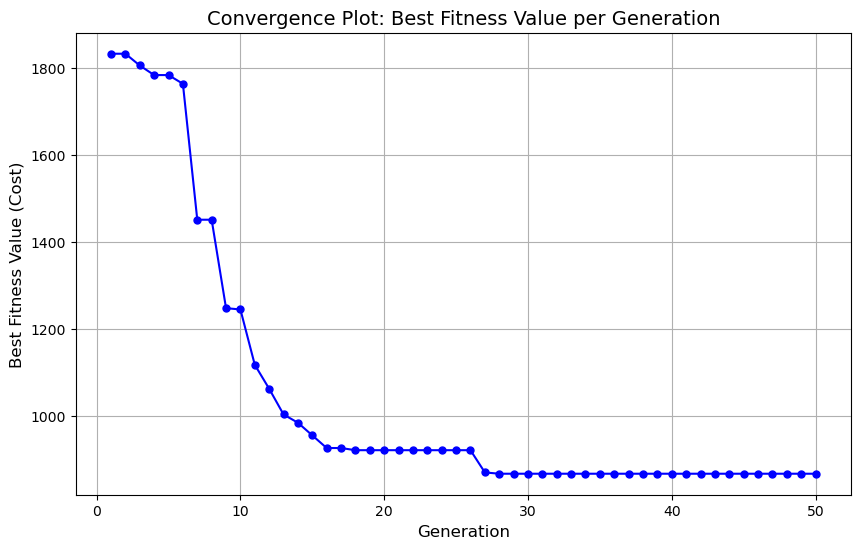

In [83]:
np.random.seed(seed)#remove if you want other instance
n = 100
instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)




random.seed(seed)#remove if you want other solutions
alpha = 1  # Pheromone importance
beta = 2  # Distance importance
evaporation_rate = 0.5  # Pheromone evaporation
Q = 100  # Total pheromone deposited per ant per tour
max_iterations = 50  # Number of iterations
n_ants = 100  # Number of ants

# Generate a random TSP instance
"""instance = generate_tsp(n=n)
cost_matrix = get_rounded_euclidean_distances(instance)"""

best_route, best_cost, best_costs_over_iterations = ant_colony_optimization(n, cost_matrix, n_ants=n_ants, max_iterations=max_iterations, alpha=alpha, evaporation_rate=evaporation_rate,next_city_function=choose_next_city_including_distance)# beta=beta,
print(len(best_route))



# Return the scores (best cost over generations)
print(f"Best Costs Over Generations: {best_costs_over_iterations}")
plot_convergence(best_costs_over_iterations, max_iterations)

## To Go a Bit Further:
To have a more accurate comparison, modify the 2-opt, genetic algorithm, and ant colony functions by setting a time limit for execution. This will allow us to evaluate which method performs best under a constrained time. Additionally, the initial populations should be randomized.

### Conclusion

In this study, we explored several metaheuristic algorithms for solving optimization problems, focusing on both single-based and population-based methods, as well as those that leverage the structure of the solution. Here are the key insights:

- **Single-based Metaheuristics**: The **2-opt** algorithm performs well in refining an initial solution quickly, particularly when starting with a reasonably good solution. Its simplicity and fast convergence allow it to efficiently find high-quality solutions. However, it can get stuck in local minima, which limits its ability to explore the broader solution space, especially in complex problems. While fast, it lacks the capacity to escape local optima without further refinement or modification.

- **Population-based Metaheuristics**: **Genetic Algorithms (GA)** introduce a population-based approach, offering a broader exploration of the solution space through genetic diversity. GA tends to perform well in situations where the problem space is vast and complex. However, in this study, it did not outperform **2-opt** in terms of solution quality within a fixed amount of time. Its advantage lies in maintaining diversity and reducing the likelihood of getting trapped in local minima, but it requires more time to converge, especially when the problem space is not particularly large.

- **Algorithms using the Structure of the Solution**: **Ant Colony Optimization (ACO)**, by incorporating problem-specific knowledge such as pheromone updates and the structure of the problem, converges more quickly than more generic approaches. By considering both the pheromone trail and distances, ACO is able to guide the search process more effectively, avoiding premature convergence to local optima. This balance between exploration (searching the solution space) and exploitation (reinforcing good solutions) allows ACO to efficiently find high-quality solutions and avoid stagnation in local minima.

In summary, each algorithm has its strengths and is suited for different scenarios. **2-opt** is fast and effective in refining a good initial solution, but it may struggle with complex landscapes and get stuck in local minima. **GA** excels in exploring a wide solution space but tends to converge more slowly. **ACO**, leveraging problem-specific structure, strikes a balance by converging quickly and effectively avoiding local minima. By incorporating knowledge of the problem’s structure, such as using pheromone trails or heuristics, we can achieve faster convergence and more reliable results compared to more generic approaches. Therefore, the choice of algorithm should be guided by the problem characteristics and the desired balance between exploration and exploitation.

Sources: 
 - https://cocalc.com/github/mobook/MO-book/blob/main/notebooks/04/08-traveling-salesman-problem.ipynb
 - https://github.com/regularlady/willyloman
 - https://notebook.community/40423140/123456/content/notebook/Solving%20the%20TSP%20with%20GAs
 - https://www.routific.com/blog/travelling-salesman-problem
 - https://slowandsteadybrain.medium.com/traveling-salesman-problem-ce78187cf1f3
 - https://medium.com/@pasdan/genetic-algorithm-the-travelling-salesman-problem-via-python-deap-f238e0dd1a73
 - https://medium.com/@davidlfliang/intro-python-algorithms-traveling-salesman-problem-ffa61f0bd47b